##### Carregando as bibliotecas e definindo funções últeis

In [165]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform, data, io, color, img_as_ubyte

In [166]:
# Função para mostrar a imagem
def showImage(image, title):
    plt.imshow(image, cmap='gray') 
    plt.title(title)
    plt.show()

In [167]:
# Definir função para realizar as filtragens passa baixa, passa alta e passa faixa
def filtering_pass(image, cutoff, cutoff2=None, type='low'):
    mask  = 1
    mask2 = 1
    

    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Transformada de Fourier 2D
    image_fft =  np.fft.fftshift(np.fft.fft2(image))

    # Obter as dimensões da imagem
    rows, cols = image.shape

    # Criar um filtro passa-baixa (círculo)
    x, y = np.ogrid[:rows, :cols]
    center = (rows // 2, cols // 2)
    
    if type == 'low':
        mask = np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * (cutoff * rows)**2))
    
    elif type == 'hight':
        mask = 1 - np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * (cutoff * rows)**2))
    
    elif type == 'band':
        mask  = np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * (cutoff * rows)**2))
        mask2 = 1 - np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * (cutoff2 * rows)**2))
    
    else: 
        return None

    # Aplicar o filtro e inverte a centralização
    image_fft_filtered = np.fft.ifftshift(image_fft * mask * mask2)

    # Inverter a transformada de Fourier (retorna ao domínio do tempo)
    image_filtered = np.abs(np.fft.ifft2(image_fft_filtered))

    return img_as_ubyte(image_filtered)

In [168]:
# Definir função para realizar a convolução entre a imagem e os kernels
def convolution(image, kernel):
    # Obter as dimensões da imagem e do kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Inicializar a imagem resultante com zeros 
    result = np.zeros_like(image)

    # Realizar a convolução nas duas dimensões da imagem
    for i in range(image_height - kernel_height + 1):
        for j in range(image_width - kernel_width + 1):
            
            # Extração da região da imagem correspondente ao kernel
            region = image[i:i + kernel_height, j:j + kernel_width]

            # Aplicar o kernel e somar os resultados
            result[i, j] = np.sum(region * kernel)

    return result


In [169]:
# Definir função para realizar a filtragem com Operador de Sobel
def filtering_sobel_operator(image):
    # Definir os kernels de Sobel para as direções horizontal e vertical
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Realizar a convolução com os kernels
    sobel_x_result = convolution(image, sobel_x)
    sobel_y_result = convolution(image, sobel_y)

    # Calcular a magnitude do gradiente
    magnitude = np.hypot(sobel_x_result, sobel_y_result)

    return magnitude


In [170]:
# Definir uma função para realizar o filtro de suavização por média dos pixels vizinhos 
# O tamanho do kernel define a intensidade da suavização
def smooth_mean_filter(image, kernel_size):
    # Criar um kernel de média com todos os elementos iguais
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)

    # Realizar a convolução com o kernel
    result = convolution(image, kernel)

    return result

##### Questão 01

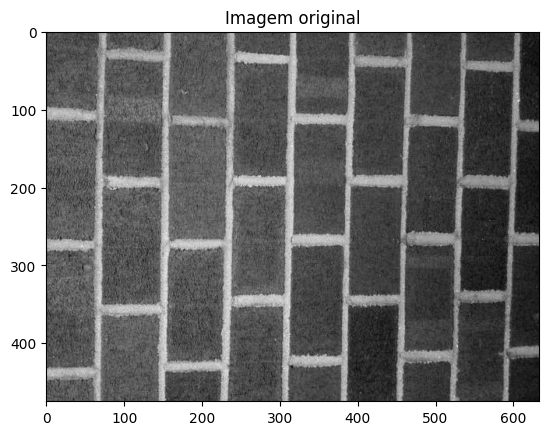

'\n    A imagem carregada mostra uma parede feita de tijolos e cimento.\n    \n'

In [188]:
# Carregar a imagem bricks.jpg em escala de cinza
image = color.rgb2gray(io.imread('bricks.jpg'))


showImage(image, "Imagem original")

'''
    A imagem carregada mostra uma parede feita de tijolos e cimento.
    
'''

##### Questão 02

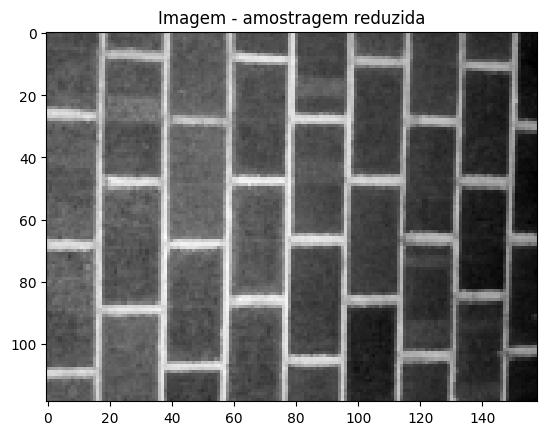

'\n        Ao diminuir a taxa de amostragem da imagem, o número de pixels é reduzido. Ou seja, a imagem sofre uma perca de detalhes\n    já que a quantidade de informações para representar a mesma imagem é reduzida. \n        A resolução diminui a medida que a quantidade de amostras é reduzida, e consequentemente há uma suavização nos detalhes de borda,\n    o que dá uma impressão de transição mais suave entre o tijolo e suas bordas.    \n    \n'

In [187]:
# Definir a nova taxa de amostragem - redução por um fator de 16 (um quarto do tamanho original em ambas as dimensões)
image_less_simple = transform.rescale(image, 0.25)

# Mostrar a imagem
showImage(image_less_simple, "Imagem - amostragem reduzida")

'''
        Ao diminuir a taxa de amostragem da imagem, o número de pixels é reduzido. Ou seja, a imagem sofre uma perca de detalhes
    já que a quantidade de informações para representar a mesma imagem é reduzida. 
        A resolução diminui a medida que a quantidade de amostras é reduzida, e consequentemente há uma suavização nos detalhes de borda,
    o que dá uma impressão de transição mais suave entre o tijolo e suas bordas.    
    
'''

##### Questão 03

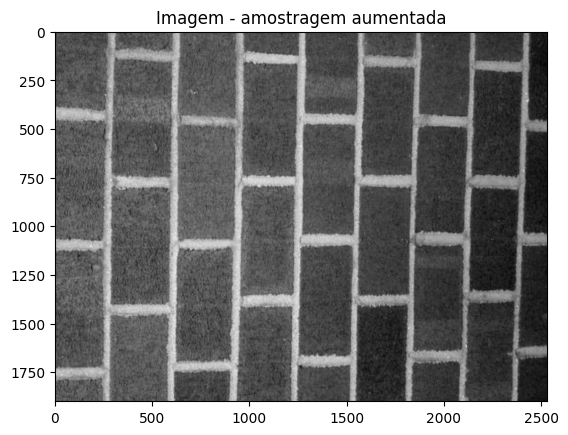

'\n        Com o aumento da taxa de amostragem, ocorre o aumento da resolução da imagem, ou seja, é adicionado mais pixels para a representação\n    tornando a imagam mais nítida. Assim, é possível capturar maiores detalhes da imagem original. Neste caso, as bordas dos tijolos\n    tornam-se mais nítidas e a transição menos suave. \n    \n'

In [186]:
# Definir a nova taxa de amostragem - aumento por um fator de 16 (quarto veses o tamanho original em ambas as dimensões)
image_more_simple = transform.rescale(image, 4)

# Mostrar a imagem
showImage(image_more_simple, "Imagem - amostragem aumentada")

'''
        Com o aumento da taxa de amostragem, ocorre o aumento da resolução da imagem, ou seja, é adicionado mais pixels para a representação
    tornando a imagam mais nítida. Assim, é possível capturar maiores detalhes da imagem original. Neste caso, as bordas dos tijolos
    tornam-se mais nítidas e a transição menos suave. 
    
'''

##### Questão 04

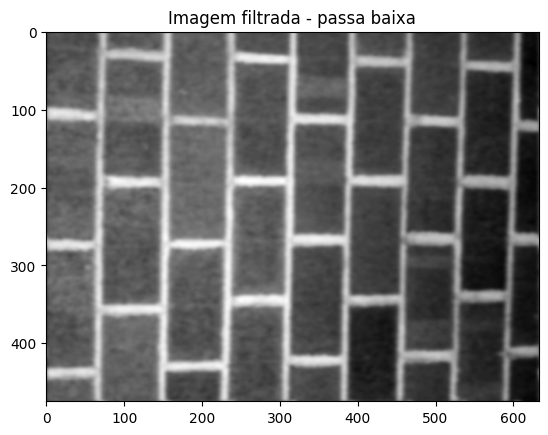

"\n        A aplicação do filtro passa baixa causa uma atenuação nas frequências mais altas da imagem, ou seja, \n    atenuando detalhes 'finos' e mais nítidos, diminuindo assim transições bruscas de intensidade.\n    Dessa forma, ocorre uma suavização nas bordas dos tijolos tornando-as mais suaves.\n        Também, percebe-se que há a diminuição de ruídos e granularidade na imagem. \n    \n"

In [185]:
# Aplicar o filtro passa baixa
image_filtered = filtering_pass(image, 0.08, type='low')

# Mostrar a imagem filtrada
showImage(image_filtered, "Imagem filtrada - passa baixa")

'''
        A aplicação do filtro passa baixa causa uma atenuação nas frequências mais altas da imagem, ou seja, 
    atenuando detalhes 'finos' e mais nítidos, diminuindo assim transições bruscas de intensidade.
    Dessa forma, ocorre uma suavização nas bordas dos tijolos tornando-as mais suaves.
        Também, percebe-se que há a diminuição de ruídos e granularidade na imagem. 
    
'''


##### Questão 05

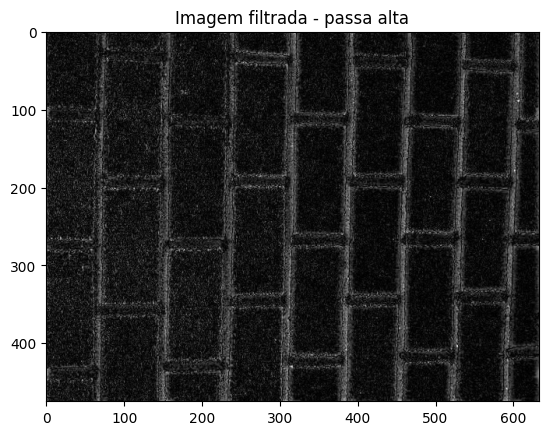

'\n        Com a aplicação do filtro passa alta, ocorre um efeito contrário ao do filtro passa baixa. Ou seja, é enfatizado as frequências \n    mais altas e atenuando as baixas frequências. Dessa forma, o filtro age como um realçador de bordas e detalhes finos, \n    uma vez que as bordas apresentam transições bruscas de intensidade.\n        Percebe-se que a imagem torna-se mais sensível ao ruído de altas frequência e granulações.\n    \n'

In [184]:
# Aplicar o filtro passa alta
image_filtered = filtering_pass(image, 0.05, type='hight')

# Mostrar a imagem filtrada 
showImage(image_filtered, "Imagem filtrada - passa alta")

'''
        Com a aplicação do filtro passa alta, ocorre um efeito contrário ao do filtro passa baixa. Ou seja, é enfatizado as frequências 
    mais altas e atenuando as baixas frequências. Dessa forma, o filtro age como um realçador de bordas e detalhes finos, 
    uma vez que as bordas apresentam transições bruscas de intensidade.
        Percebe-se que a imagem torna-se mais sensível ao ruído de altas frequência e granulações.
    
'''

##### Questão 06

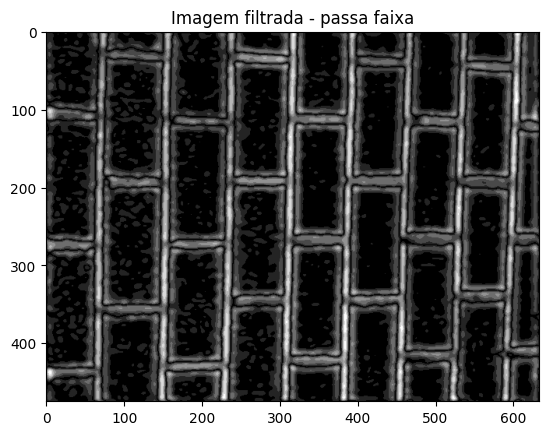

'\n        A aplicação do filtro passa faixa entre as frequências de corte usadas nos filtros anteriores\n    tenta realçar um padrão específico da imagem que correspondem às bordas dos tijolos. \n    Isto é, o filtro seleciona uma faixa de frequência que haja, ao mesmo tempo, uma suavização e realce das bordas \n    dos tijolos, tornando tais bordas destacadas e as outras informações atenuadas na imagem. \n    \n'

In [183]:
# Aplicar o filtro passa faixa
image_filtered = filtering_pass(image, 0.05, cutoff2=0.08, type='band')

# Mostrar a imagem filtrada
showImage(image_filtered, "Imagem filtrada - passa faixa")

'''
        A aplicação do filtro passa faixa entre as frequências de corte usadas nos filtros anteriores
    tenta realçar um padrão específico da imagem que correspondem às bordas dos tijolos. 
    Isto é, o filtro seleciona uma faixa de frequência que haja, ao mesmo tempo, uma suavização e realce das bordas 
    dos tijolos, tornando tais bordas destacadas e as outras informações atenuadas na imagem. 
    
'''


##### Questão 07

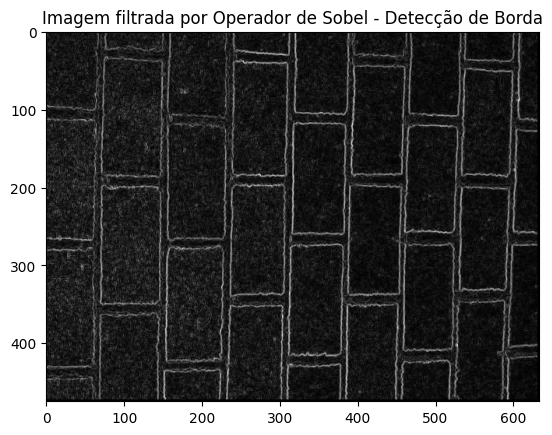

'\n        Ao aplicar o filtro de Operador de Sobel, as transições de alta intensidade são destacadas, realçando assim \n    as bordas. A detecção das bordas ocorrem ao longo da largura e altura da imagem por meio de duas matrizes (Kernels), \n    uma para detectação de transições de intensidade da direção horizontal e outra na direção vertical.\n    \n        Após isto, é realizado o cálculo do gradiente, obtido por meio da combinação das respostas dos \n    kernels horizontal e vertical. A magnitude representa o quanto houve mudança de intensidade naquele ponto da imagem.\n\n'

In [182]:
# Realizar filtragem com o Operador de Sobel
image_filtered_sobel = filtering_sobel_operator(image)

# Mostrar a imagem filtrada
showImage(image_filtered_sobel, "Imagem filtrada por Operador de Sobel - Detecção de Borda")

'''
        Ao aplicar o filtro de Operador de Sobel, as transições de alta intensidade são destacadas, realçando assim 
    as bordas. A detecção das bordas ocorrem ao longo da largura e altura da imagem por meio de duas matrizes (Kernels), 
    uma para detectação de transições de intensidade da direção horizontal e outra na direção vertical.
    
        Após isto, é realizado o cálculo do gradiente, obtido por meio da combinação das respostas dos 
    kernels horizontal e vertical. A magnitude representa o quanto houve mudança de intensidade naquele ponto da imagem.

'''



##### Questão 08

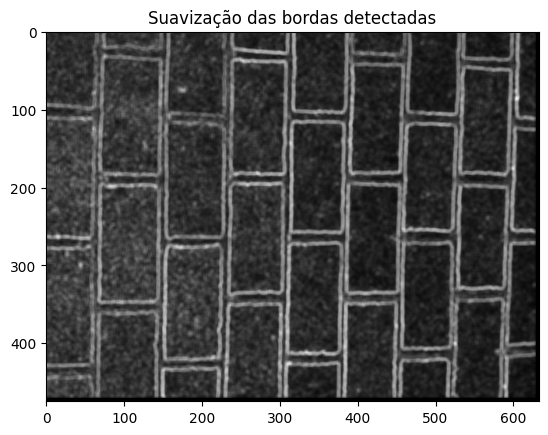

"\n        A suavização da imagem filtrada pelo operador de sobel realiza um realce nas bordas detectadas \n    pelo filtro anterior. O filtro suavisador é um filtro de média que realiza a suavização por meio da substituição \n    de cada pixel da imagem pela média dos valores dos pixels em sua vizinhança.\n    \n        O kernel de média age como uma 'janela deslizante' sobre a imagem realizando a substituição \n    dos pixels pela média da sua vizinhança (definida pelo tamanho do kernel). Ou seja, quanto maior\n    o kernel de média (maior a vizinhança de pixels), mais intensa é a suavização aplicada em cada pixel da imagem.\n    \n        Foi escolhido o tamanho de kernel igual a 5, pois suavisou bem a imagem.\n     \n"

In [180]:
# Realiza a suavização das bordas detectadas pelo filtro operador de Sobel 
image_filtered_sobel_smooth = smooth_mean_filter(image_filtered_sobel, 5)

# Mostrar a imagem filtrada por sobel e suavizada
showImage(image_filtered_sobel_smooth, "Suavização das bordas detectadas")

'''
        A suavização da imagem filtrada pelo operador de sobel realiza um realce nas bordas detectadas 
    pelo filtro anterior. O filtro suavisador é um filtro de média que realiza a suavização por meio da substituição 
    de cada pixel da imagem pela média dos valores dos pixels em sua vizinhança.
    
        O kernel de média age como uma 'janela deslizante' sobre a imagem realizando a substituição 
    dos pixels pela média da sua vizinhança (definida pelo tamanho do kernel). Ou seja, quanto maior
    o kernel de média (maior a vizinhança de pixels), mais intensa é a suavização aplicada em cada pixel da imagem.
    
        Foi escolhido o tamanho de kernel igual a 5, pois suavisou bem a imagem.
     
'''
